In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
my_data = pd.read_csv("wasabi_artists.csv")

/Users/jet/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Visualising the data
my_data.head()

,_id,disambiguation,endArea,endArea.disambiguation,endArea.id,endArea.name,gender,genres,id_artist_musicbrainz,labels,...,members.XX.urlYouTube,members.XX.urlBBC,members.XX.urlSecondHandSongs,urlInstagram,members.XX.urlSoundCloud,members.XX.urlInstagram,urlGooglePlus,members.XX.urlPureVolume,members.XX.urlGooglePlus,animux_path_ambiguous
0,ObjectId(56d7e91b6b60c09814f93e4a),British band,"{""id"":"""",""name"":"""",""disambiguation"":""""}",NaN,NaN,NaN,NaN,[],55c6eb6e-8388-497c-acaf-dbff584d0c3a,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ObjectId(56d7e91c6b60c09814f93e4c),Japanese Band,"{""id"":"""",""name"":"""",""disambiguation"":""""}",NaN,NaN,NaN,NaN,"[""J-Rock"",""Visual Kei""]",51257cf7-1672-4580-ae5c-93eefe3684fb,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ObjectId(56d7e91d6b60c09814f93e4e),NaN,"{""id"":"""",""name"":"""",""disambiguation"":""""}",NaN,NaN,NaN,NaN,[],8cb0ebc9-db95-4748-81df-8e1e24e70541,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ObjectId(56d7e91e6b60c09814f93e50),NaN,"{""id"":"""",""name"":"""",""disambiguation"":""""}",NaN,NaN,NaN,NaN,[],4616c4f1-fe79-40f0-ac8d-2b319528b683,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ObjectId(56d7e91e6b60c09814f93e52),NaN,"{""id"":"""",""name"":"""",""disambiguation"":""""}",NaN,NaN,NaN,NaN,[],e5fd8fd1-9073-4586-a741-e44164e543db,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
my_data['location.country'].isna().sum()

34052

In [5]:
my_data['locationInfo'].isna().sum()

0

In [6]:
# Selecting the useful values
features = ["genres", "location.country", "location.city", "disambiguation", "name", "lifeSpan.ended", "lifeSpan.end", "locationInfo"]
my_ds = my_data[features]
my_ds.head()

,genres,location.country,location.city,disambiguation,name,lifeSpan.ended,lifeSpan.end,locationInfo
0,[],United Kingdom,Suffolk,British band,A,False,NaN,"[""England"",""West Yorkshire"",""Leeds""]"
1,"[""J-Rock"",""Visual Kei""]",Japan,NaN,Japanese Band,A (エース) (ACE),False,NaN,"[""Japan""]"
2,[],Netherlands,NaN,NaN,A Balladeer,False,NaN,[]
3,[],NaN,NaN,NaN,A Beautiful Silence,False,NaN,"[""United States"",""Michigan"",""Marquette""]"
4,[],United States,NaN,NaN,A Band Called Pain,False,NaN,"[""United States"",""California"",""Oakland""]"


In [7]:
# Taking the artist country from the locationInfo attribute.
count_na = 0
count = 0

for index in my_ds.index:
    string_split = my_ds['locationInfo'][index].split('"')
    
    if (len(string_split) > 1):
        count += 1
        my_ds['locationInfo'][index] = string_split[1]
    else:
        count_na += 1
        my_ds['locationInfo'][index] = np.nan
        
        
print('The NaN value count is: {}', count_na)
print('The value count is: {}', count)

<ipython-input-7-b9e291405187>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_ds['locationInfo'][index] = string_split[1]
/Users/jet/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-7-b9e291405187>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_ds['locationInfo'][index] = np.nan


The NaN value count is: {} 29898
The value count is: {} 47594


In [8]:
my_ds.tail()

,genres,location.country,location.city,disambiguation,name,lifeSpan.ended,lifeSpan.end,locationInfo
77487,"[""Folk""]",NaN,NaN,soulseek electro/breakcore artist,Zara,False,NaN,Turkey
77488,[],United States,NaN,New Orleans hard rock band,Zebra,False,NaN,United States
77489,[],NaN,NaN,NaN,Zebra & Giraffe,False,NaN,South Africa
77490,[],NaN,NaN,"Underground, free, Rap",Zearle,False,NaN,United States
77491,[],NaN,NaN,NaN,Zecchino DOro,False,NaN,NaN


In [9]:
# Counting the na value in the selected features
my_ds.isnull().sum()

genres                  0
location.country    34052
location.city       58655
disambiguation      65759
name                    0
lifeSpan.ended          0
lifeSpan.end        69023
locationInfo        29898
dtype: int64

In [10]:
country_list = my_ds.groupby('locationInfo').size()
country_list

locationInfo
Albania       37
Algeria        8
Andorra        2
Angola         6
Argentina    442
            ... 
Venezuela     74
Vietnam       42
Wales        123
Zambia         3
Zimbabwe       3
Length: 175, dtype: int64

In [11]:
my_ds['locationInfo'].unique()

array(['England', 'Japan', nan, 'United States', 'Belgium', 'Australia',
       'Sweden', 'The Netherlands', 'Brazil', 'Bolivia', 'Switzerland',
       'Germany', 'Denmark', 'Italy', 'Thailand', 'Ireland', 'Austria',
       'Canada', 'Spain', 'South Korea', 'France', 'Poland', 'Norway',
       'Portugal', 'Argentina', 'Venezuela', 'Finland', 'Turkey',
       'Mexico', 'Czech Republic', 'Montenegro', 'India', 'Malaysia',
       'Pakistan', 'New Zealand', 'Estonia', 'Greece', 'Hungary',
       'Russia', 'Chile', 'Lithuania', 'Indonesia', 'Colombia',
       'Northern Ireland', 'Taiwan', 'Israel', 'Scotland', 'Jamaica',
       'Mozambique', 'Moldova', 'Slovakia', 'Serbia', 'United Kingdom',
       'Philippines', 'Peru', 'The Bahamas', 'Rwanda', 'Syria',
       'South Africa', 'Sierra Leone', 'Malta', 'Multinational',
       'Costa Rica', 'Belarus', 'Latvia', 'Romania', 'Iran', 'Singapore',
       'Wales', 'Ecuador', 'Bulgaria', 'Puerto Rico', 'Croatia',
       'Slovenia', 'Iraq', 'Ukraine'

In [12]:
temp_data = my_ds.groupby(['locationInfo'])

In [13]:
unique_country = my_ds['locationInfo'].unique()
unique_country

array(['England', 'Japan', nan, 'United States', 'Belgium', 'Australia',
       'Sweden', 'The Netherlands', 'Brazil', 'Bolivia', 'Switzerland',
       'Germany', 'Denmark', 'Italy', 'Thailand', 'Ireland', 'Austria',
       'Canada', 'Spain', 'South Korea', 'France', 'Poland', 'Norway',
       'Portugal', 'Argentina', 'Venezuela', 'Finland', 'Turkey',
       'Mexico', 'Czech Republic', 'Montenegro', 'India', 'Malaysia',
       'Pakistan', 'New Zealand', 'Estonia', 'Greece', 'Hungary',
       'Russia', 'Chile', 'Lithuania', 'Indonesia', 'Colombia',
       'Northern Ireland', 'Taiwan', 'Israel', 'Scotland', 'Jamaica',
       'Mozambique', 'Moldova', 'Slovakia', 'Serbia', 'United Kingdom',
       'Philippines', 'Peru', 'The Bahamas', 'Rwanda', 'Syria',
       'South Africa', 'Sierra Leone', 'Malta', 'Multinational',
       'Costa Rica', 'Belarus', 'Latvia', 'Romania', 'Iran', 'Singapore',
       'Wales', 'Ecuador', 'Bulgaria', 'Puerto Rico', 'Croatia',
       'Slovenia', 'Iraq', 'Ukraine'

In [14]:
my_ds.shape

(77492, 8)

In [15]:
features = ['country', 'artist_count']
final_df = pd.DataFrame(columns = features)

# Counting the number of artist by country and saving in the dataframe.
for country in unique_country:
    artist_count = len(my_ds[my_ds['locationInfo'] == country])
    
#     final_df['country'][idx] = country
#     final_df['artist_count'][idx] = artist_count
    
#     my_ds['artist_count'][idx] = artist_count
    print('Country is: {} and artist count is: {}'.format(country, artist_count))

Country is: England and artist count is: 4162
Country is: Japan and artist count is: 710
Country is: nan and artist count is: 0
Country is: United States and artist count is: 19495
Country is: Belgium and artist count is: 373
Country is: Australia and artist count is: 1097
Country is: Sweden and artist count is: 1519
Country is: The Netherlands and artist count is: 865
Country is: Brazil and artist count is: 884
Country is: Bolivia and artist count is: 16
Country is: Switzerland and artist count is: 209
Country is: Germany and artist count is: 3022
Country is: Denmark and artist count is: 364
Country is: Italy and artist count is: 1482
Country is: Thailand and artist count is: 11
Country is: Ireland and artist count is: 284
Country is: Austria and artist count is: 290
Country is: Canada and artist count is: 1937
Country is: Spain and artist count is: 841
Country is: South Korea and artist count is: 114
Country is: France and artist count is: 1308
Country is: Poland and artist count is:

In [16]:
# Counting the artists by country
my_ds['locationInfo'].value_counts().to_dict()
country_ = pd.DataFrame(my_ds['locationInfo'].value_counts().reset_index().values, columns = ['name', 'size'])


In [20]:
# country_['id'] = 0
# adding column index
for index in country_.index:
    country_['id'][index] = index

<ipython-input-20-0a1f3dd4c52a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_['id'][index] = index


In [21]:
country_

,name,size,id
0,United States,19495,0
1,England,4162,1
2,Germany,3022,2
3,Canada,1937,3
4,Sweden,1519,4
...,...,...,...
170,Czech Republic‎,1,170
171,Oman,1,171
172,Fiji,1,172
173,French Guiana,1,173


In [22]:
!pip install pycountry
import pycountry

You should consider upgrading via the '/Users/jet/anaconda3/bin/python -m pip install --upgrade pip' command.


In [23]:
# Visioning the list of countries in the package
list(pycountry.countries)[0]

Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533')

In [26]:
# country_['value'] = 0
# Adding the percentage
for index in country_.index:
    country_['value'][index] = country_['size'][index]

<ipython-input-26-00324349f2df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_['value'][index] = country_['size'][index]


In [27]:
for idx in country_.index:
    try:
        res = pycountry.countries.search_fuzzy(country_['name'][idx])
        country_['id'][idx] = res[0].alpha_3
    except LookupError:
        print('Nothing for {}'.format(country_['name'][idx]))

<ipython-input-27-831a5dfda42a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_['id'][idx] = res[0].alpha_3
/Users/jet/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Nothing for Multinational
Nothing for South Korea
Nothing for Democratic Republic of the Congo
Nothing for Republic of Kosovo
Nothing for Cape Verde
Nothing for Netherlands Antilles
Nothing for United States Virgin Islands
Nothing for United_States
Nothing for The Netherlands‎
Nothing for Multinational‎
Nothing for United  States
Nothing for Czech Republic‎


In [28]:
# Correcting mispelled country name
country_[country_['name'] == 'United  States'] = 'United States'

In [29]:
country_['id'].value_counts()

GBR    5
FRA    2
HUN    1
UZB    1
URY    1
      ..
UGA    1
VAT    1
GUY    1
BRB    1
HTI    1
Name: id, Length: 170, dtype: int64

In [35]:
country_

,name,size,id,value,percent
0,United States,19495,USA,19495,0
1,England,4162,GBR,4162,0
2,Germany,3022,DEU,3022,0
3,Canada,1937,CAN,1937,0
4,Sweden,1519,SWE,1519,0
...,...,...,...,...,...
170,Czech Republic‎,1,170,1,0
171,Oman,1,OMN,1,0
172,Fiji,1,FJI,1,0
173,French Guiana,1,GUF,1,0


In [36]:
# country_['percent'] = 0
# Adding the percentage - To be removed
for index in country_.index:
    country_['percent'][index] = round((country_['size'][index] / country_['size'].sum()) * 100, 2)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [46]:
for idx in country_['id'].unique():
    country_number = country_['id'][idx]
    
    if len(country_number) > 1:
        print(country_['id'])

KeyError: 'USA'

In [39]:
country_

,name,size,id,value,percent
0,United States,19495,USA,19495,0
1,England,4162,GBR,4162,0
2,Germany,3022,DEU,3022,0
3,Canada,1937,CAN,1937,0
4,Sweden,1519,SWE,1519,0
...,...,...,...,...,...
170,Czech Republic‎,1,170,1,0
171,Oman,1,OMN,1,0
172,Fiji,1,FJI,1,0
173,French Guiana,1,GUF,1,0


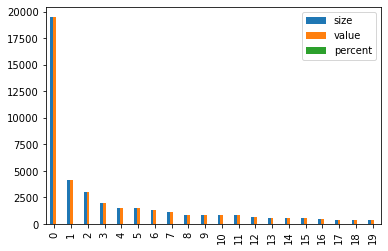

In [40]:
country_[:20].plot(kind='bar').

In [41]:
# Saving the json to be used in D3JS
country_.to_json('countries_1.json', orient='records')

In [43]:
country_.to_csv('country.csv')

In [ ]:
usa_artist = my_ds[my_ds['locationInfo'] == 'United States']

In [ ]:
for idx in my_ds.index:
    row = my_ds['genres'][idx]
    n_row = row.split('"')
    
    if len(n_row) > 1: 
        my_ds['genres'][idx] = n_row[1]
    else:
        my_ds['genres'][idx] = np.nan

In [ ]:
my_ds['genres'].unique()

In [ ]:
my_ds['genres'].unique().shape

In [ ]:
temp = my_ds.groupby('locationInfo')['genres'].value_counts().unstack().fillna(0)

In [ ]:
temp.head()

In [ ]:
temp.reset_index(inplace = True, drop = False)
temp

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
us_pie_data = temp[temp['locationInfo'] == 'France']

In [ ]:
labels = []
size = []
for x in us_pie_data.columns:
    if isinstance(us_pie_data[x].values[0], float):
        if us_pie_data[x].values > 5:
            labels.append(x)
            size.append(us_pie_data[x].values[0])

In [ ]:
labels

In [ ]:
np.mean(size)

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(size, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()